# What's in an Avocado Toast: A Supply Chain Analysis

You're in London, making an avocado toast, a quick-to-make dish that has soared in popularity on breakfast menus since the 2010s. A simple smashed avocado toast can be made with five ingredients: one ripe avocado, half a lemon, a big pinch of salt flakes, two slices of sourdough bread and a good drizzle of extra virgin olive oil. It's no small feat that most of these ingredients are readily available in grocery stores. 

In this project, you'll conduct a supply chain analysis of three of these ingredients used in an avocado toast, utilizing the Open Food Facts database. This database contains extensive, openly-sourced information on various foods, including their origins. Through this analysis, you will gain an in-depth understanding of the complex supply chain involved in producing a single dish.

Three pairs of files are provided in the data folder:
- A CSV file for each ingredient, such as `avocado.csv`, with data about each food item and countries of origin
- A TXT file for each ingredient, such as `relevant_avocado_categories`, containing only the category tags of interest for that food.

Here are some other key points about these files:
- Some of the rows of data in each of the three CSV files do not contain relevant data for your investigation. In each dataset, you will need to filter out rows with irrelevant data, based on values in the `categories_tags` column. Examples of categories are, fruits, vegetables, and fruit-based oils. Filter the DataFrame to include only rows where `categories_tags` contains one of the tags in the relevant categories for that ingredient.
- Each row of data usually has multiple categories tags in the `categories_tags` column.
- There is a column in each CSV file called `origins_tags` with strings for country of origin of that item.

After completing this project, you'll be armed with a list of ingredients and their countries of origin, and be well-positioned to launch into other analyses that explore how long, on average, these ingredients spend at sea.

![](avocado_wallpaper.jpeg)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Begin coding here ...

# Ancillary objects to declutter top_origin function
avocado_csv = 'data/avocado.csv'
olive_csv = 'data/olive_oil.csv'
sour_csv = 'data/sourdough.csv'

df_cols = ['code', 'lc', 'product_name_en', 'quantity', 'serving_size', 'packaging_tags', 'brands', 'brands_tags', 'categories_tags', 'labels_tags', 'countries', 'countries_tags', 'origins','origins_tags']

avocado_cagories_txt = 'data/relevant_avocado_categories.txt'
olive_cagories_txt = 'data/relevant_olive_oil_categories.txt'
sour_cagories_txt = 'data/relevant_sourdough_categories.txt'

# reading CSVs
avocado = pd.read_csv(avocado_csv, sep='\t', usecols=df_cols)

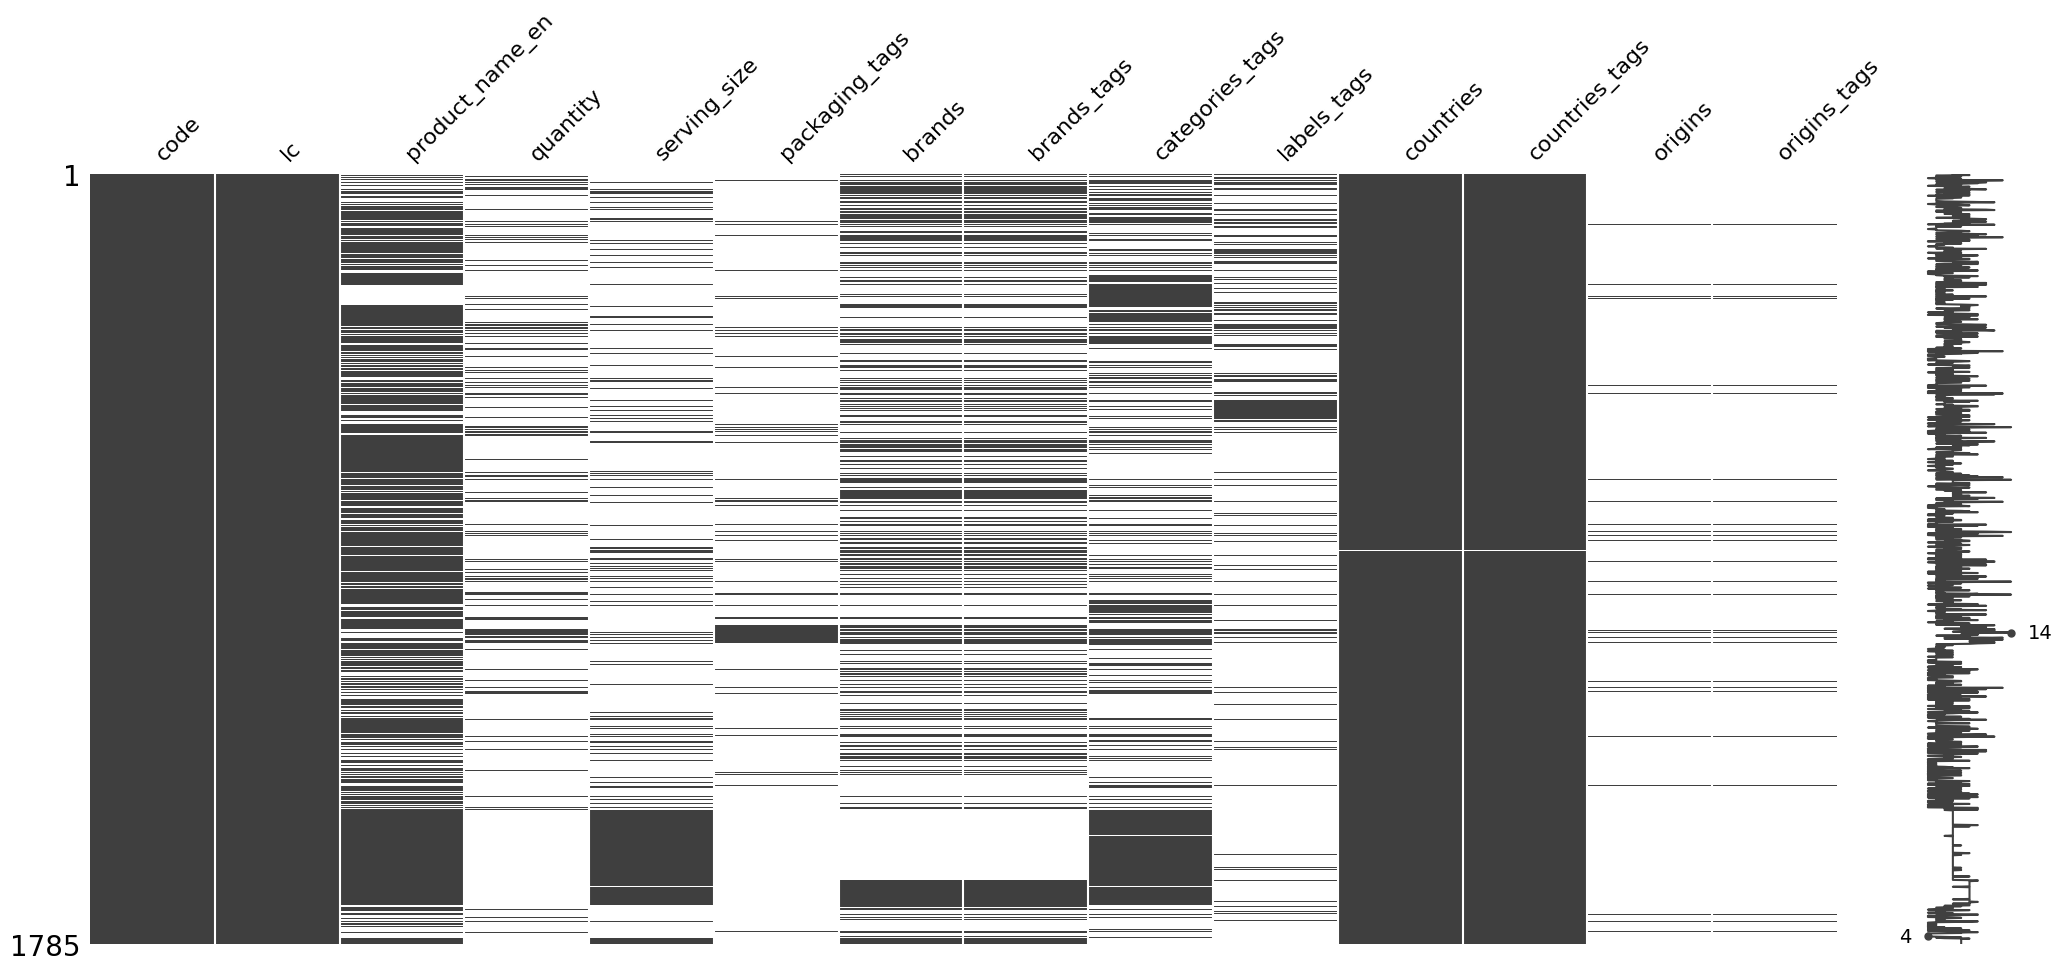

In [15]:
# Visualizing missing data
msno.matrix(avocado)
plt.show()

In [16]:
# Reading relevant categories
avocado_relevant_categories = []
with open(avocado_cagories_txt, 'r+') as file:
    for line in file:
        avocado_relevant_categories.append(line.strip('\n'))
avocado_relevant_categories = '|'.join(avocado_relevant_categories)
print(avocado_relevant_categories)

# Removing rows with empty categories
avocado.dropna(subset=['categories_tags', 'origins_tags'], inplace=True)

# Filtering relevant categories
avocado = avocado[avocado['categories_tags'].str.contains(avocado_relevant_categories)]

en:avocadoes|en:avocados|en:fresh-foods|en:fresh-vegetables|en:fruchte|en:fruits|en:raw-green-avocados|en:tropical-fruits|en:tropische-fruchte|en:vegetables-based-foods|fr:hass-avocados


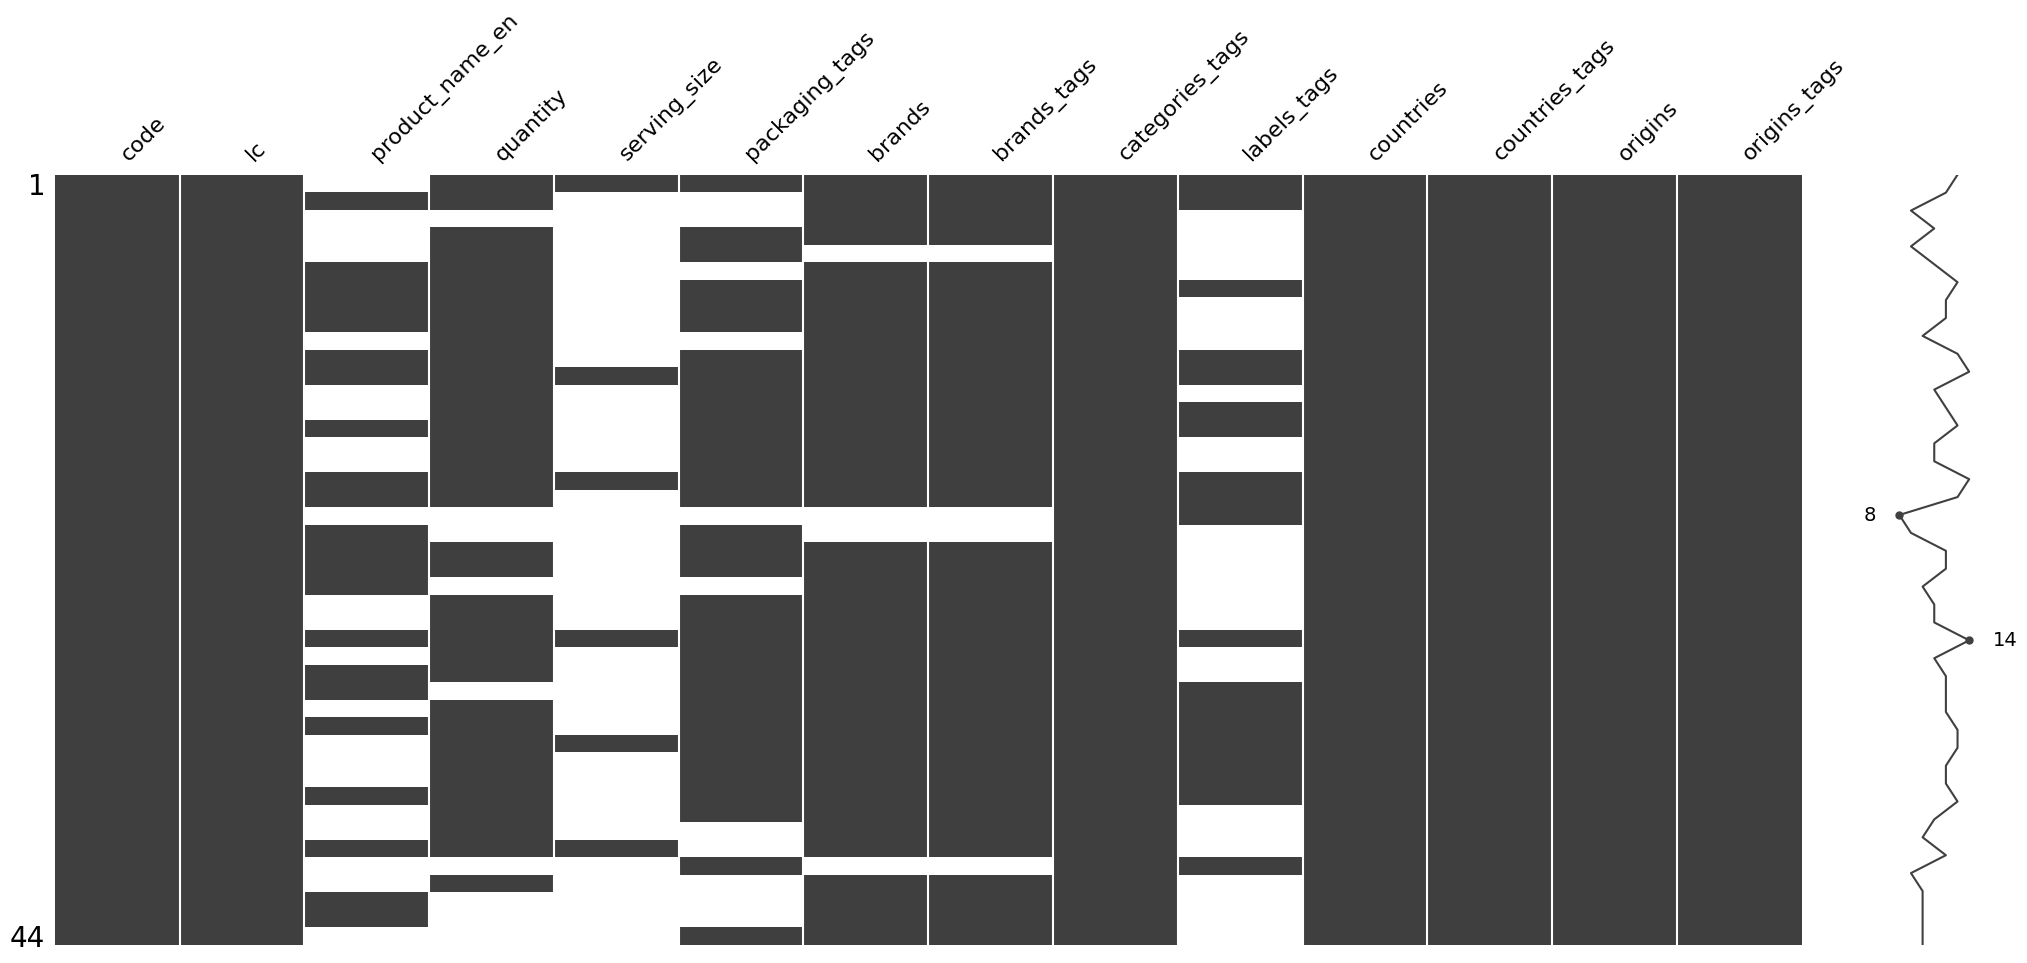

code                0
lc                  0
product_name_en    22
quantity            9
serving_size       38
packaging_tags     11
brands              4
brands_tags         4
categories_tags     0
labels_tags        25
countries           0
countries_tags      0
origins             0
origins_tags        0
dtype: int64

In [17]:
# Looking into empty data again
msno.matrix(avocado)
plt.show()
avocado.isna().sum()

In [18]:
# Splitting origins_tags with multiple valueswithin and
# generating new rows
avocado['origins_tags'] = avocado['origins_tags'].str.split(',')
avocado = avocado.explode('origins_tags').reset_index(drop=True)

avocado['countries'] = avocado['countries'].str.split(',')
avocado = avocado.explode('countries').reset_index(drop=True)
avocado

,code,lc,product_name_en,quantity,serving_size,packaging_tags,brands,brands_tags,categories_tags,labels_tags,countries,countries_tags,origins,origins_tags
0,4016249238155,de,NaN,135g,100g,de:gläschen,Allos,allos,"en:plant-based-foods-and-beverages,en:plant-ba...","en:organic,en:vegetarian,en:eu-organic,en:no-g...",Deutschland,en:germany,Europäische Union,en:european-union
1,0756058853791,en,Bio Avocado,500g,NaN,NaN,ABC Fresh GmbH,abc-fresh-gmbh,"en:plant-based-foods-and-beverages,en:plant-ba...","en:organic,en:eu-organic,en:es-eco-011-an",Germany,en:germany,Spain,en:spain
2,4311532216507,en,NaN,NaN,NaN,NaN,Edeka,edeka,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Germany,en:germany,Chile,en:chile
3,17572897,fr,NaN,3,NaN,en:net,Nosibe,nosibe,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,Mexique,en:mexico
4,3700353611843,fr,NaN,500g,NaN,en:net,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,Pérou,en:peru
5,00985833,en,Avacado,650 g,NaN,NaN,Marks & Spencer,marks-spencer,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,Peru,en:peru
6,5057172125395,en,Just Essentials Avocados,4pack,NaN,en:mixed-plastic-film-packet-to-recycle,Asda,asda,"en:plant-based-foods-and-beverages,en:plant-ba...","en:class-i,en:contains-stones",United Kingdom,en:united-kingdom,Peru,en:peru
7,23066755,en,Ready to Eat Avocados,2,NaN,en:mixed-plastic-bag,Asda,asda,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,"Spain, Peru",en:spain
8,23066755,en,Ready to Eat Avocados,2,NaN,en:mixed-plastic-bag,Asda,asda,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,"Spain, Peru",en:peru
9,0850758006270,en,Bag of Avocados,6,NaN,en:plastic,GreenFruit,greenfruit,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Canada,en:canada,Mexico,en:mexico


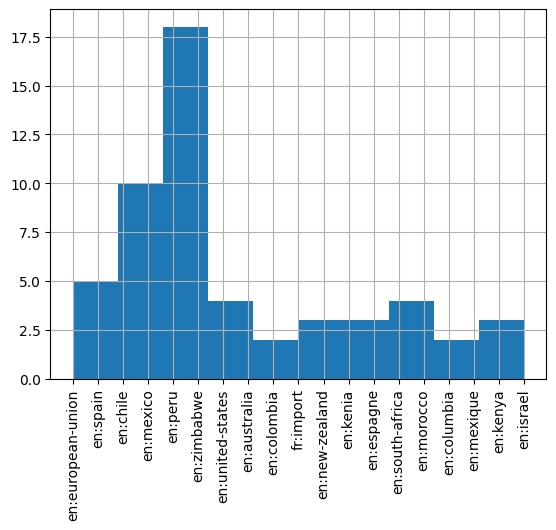

en:peru              17
en:mexico             7
en:spain              4
en:south-africa       3
en:chile              3
en:australia          3
fr:import             2
en:kenya              2
en:colombia           2
en:espagne            2
en:mexique            1
en:columbia           1
en:morocco            1
en:european-union     1
en:kenia              1
en:new-zealand        1
en:united-states      1
en:zimbabwe           1
en:israel             1
Name: origins_tags, dtype: int64


In [19]:
# visualizing tags
avocado['origins_tags'].hist(xrot=90)
plt.show()

print(avocado['origins_tags'].value_counts())

We can see that there are different tags that reffer to the same country, and some that do not referr to a country at all, e.g., `en:to-317` or `fr:import`. We need to get rid of those values and homogenize tags per country.

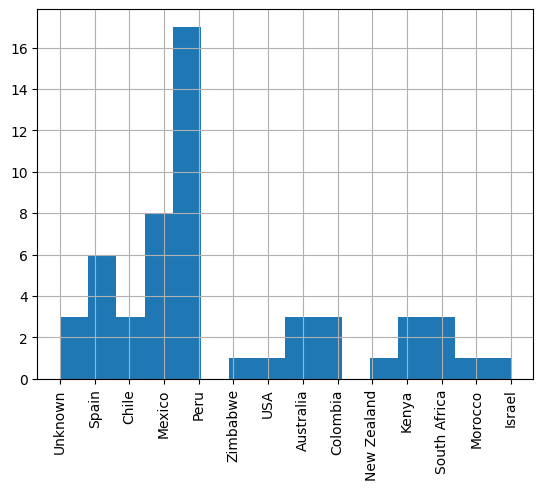

Top avocado origin: Peru


In [20]:
# Creating new categories
categories_dict = {#'Unknown': 'fr:import|en:european-union|en:to-317',
                   'Spain': 'en:spain|en:espagne',
                   'Chile': 'en:chile',
                   'Turkey': 'en:turkey',
                   'Mexico': 'en:mexico|en:mexique',
                   'Peru': 'en:peru',
                   'USA': 'en:united-states|en:california|en:etats-unis|en:dairy-from-the-united-states',
                   'Zimbabwe': 'en:zimbabwe',
                   'Australia': 'en:australia',
                   'Colombia': 'en:columbia|en:colombia',
                   'New Zealand': 'en:new-zealand',
                   'Kenya': 'en:kenya|en:kenia',
                   'South Africa': 'en:south-africa',
                   'Singapore': 'en:singapore',
                   'Morocco': 'en:morocco',
                   'Norway': 'en:norway',
                   'Israel': 'en:israel'}

# Categories and conditions
categories = list(categories_dict.keys())
conditions = []
for value in categories_dict.values():
    conditions.append(avocado['origins_tags'].str.contains(value))

avocado['new_origins_tags'] = np.select(conditions, categories, default='Unknown')
avocado['new_origins_tags'].hist(xrot=90, bins=len(categories))
plt.show()

print('Top avocado origin: ' + avocado['new_origins_tags'].value_counts().head(1).index[0])

This process can be reduced to a function so that we can apply that function to each ingredient of the avocado toast.

The functions `read_filter_and_select_country` and `top_ingredient_origin` at the begining were created to aid with cleaning the data frames, and to get the top origing per ingredient.

In [21]:
# Read, filter and select country
def read_filter_and_select_country(csv_file, csv_cols, categories_txt, country):
    '''top_origin
    '''
    # Reading CSV file
    df = pd.read_csv(csv_file, sep='\t', usecols=csv_cols)

    # Reading relevant categories from TXT file
    relevant_categories = []
    with open(categories_txt, 'r+') as file:
        for line in file:
            relevant_categories.append(line.strip('\n'))
    relevant_categories = '|'.join(relevant_categories)

    # Removing rows with empty categories
    df.dropna(subset=['categories_tags', 'origins_tags'], inplace=True)

    # Filtering relevant categories
    df = df[df['categories_tags'].str.contains(relevant_categories)]
    
    # Splitting origins_tags with multiple valueswithin and
    # generating new rows
    df['origins_tags'] = df['origins_tags'].str.split(',')
    df = df.explode('origins_tags').reset_index(drop=True)
    
    # 
    df['countries'] = df['countries'].str.split(',')
    df = df.explode('countries').reset_index(drop=True)
    
    # Selecting country
    df = df[df['countries'] == country]

    return df

# Get the top origin for ingredient
def top_ingredient_origin(df, categories_dict, remove_unknown=False):
    # Categories and list of conditions
    categories = list(categories_dict.keys())
    conditions = []
    for value in categories_dict.values():
        conditions.append(df['origins_tags'].str.contains(value))

    # Creating new_origins_tags column
    df['new_origins_tags'] = np.select(conditions, categories, default='Unknown')
    
    # Removing catecory Unknown
    if remove_unknown:
        df = df[df['new_origins_tags'] != 'Unknown']

    # Return top_origin
    return df['new_origins_tags'].value_counts().head(1).index[0]

## Avocado

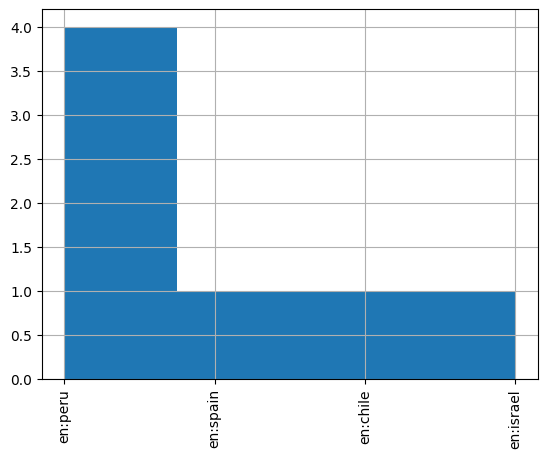

en:peru      4
en:spain     1
en:chile     1
en:israel    1
Name: origins_tags, dtype: int64


In [22]:
# Cleaning data frames
avocado_df = read_filter_and_select_country(avocado_csv, df_cols, avocado_cagories_txt, 'United Kingdom')

# visualizing tags
avocado_tags = avocado_df['origins_tags'].value_counts()
avocado_df['origins_tags'].hist(xrot=90, bins=len(avocado_tags))
plt.show()
print(avocado_tags)

## Olive Oil

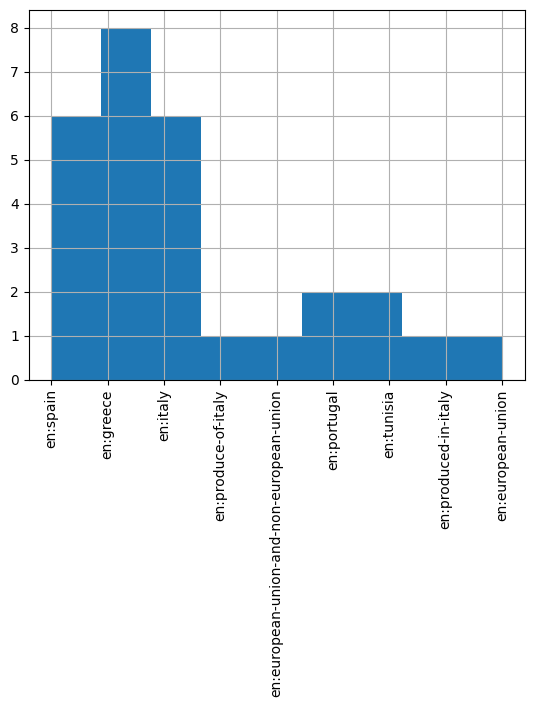

en:greece                                   8
en:spain                                    6
en:italy                                    6
en:portugal                                 2
en:tunisia                                  2
en:produce-of-italy                         1
en:european-union-and-non-european-union    1
en:produced-in-italy                        1
en:european-union                           1
Name: origins_tags, dtype: int64


In [23]:
# Cleaning data frames
olive_df = read_filter_and_select_country(olive_csv, df_cols, olive_cagories_txt, 'United Kingdom')

# visualizing tags
olive_tags = olive_df['origins_tags'].value_counts()
olive_df['origins_tags'].hist(xrot=90, bins=len(olive_tags))
plt.show()
print(olive_tags)

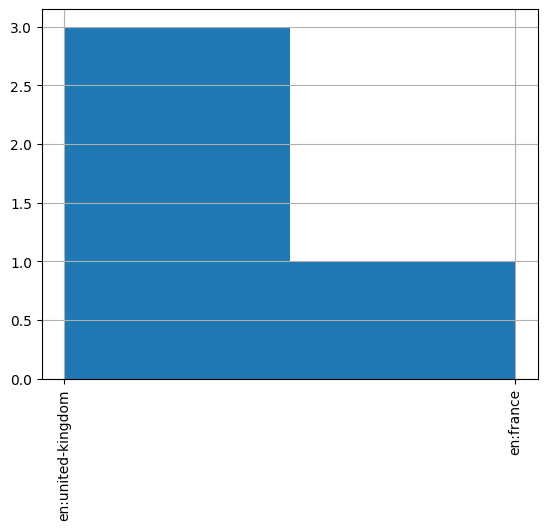

en:united-kingdom    3
en:france            1
Name: origins_tags, dtype: int64


In [24]:
# Cleaning data frames
sour_df = read_filter_and_select_country(sour_csv, df_cols, sour_cagories_txt, 'United Kingdom')

# visualizing tags
sour_tags = sour_df['origins_tags'].value_counts()
sour_df['origins_tags'].hist(xrot=90, bins=len(sour_tags))
plt.show()
print(sour_tags)

In [25]:
# Creating new categories
categories_dict = {
    'Algeria': 'en:algeria',
    'Argentina': 'en:argentina',
    'Australia': 'en:australia|en:93-australian-ingredients|en:93-australian',
    'Belgium': 'en:belgium',
    'Chile': 'en:chile',
    'Colombia': 'en:columbia|en:colombia',
    'Croatia': 'en:croatia|en:istria|hr:croatie',
    'France': 'en:france|fr:beaucaire',
    'Georgia': 'ka:tbilisi-georgia',
    'Germany': 'en:germany',
    'Greece': 'en:greece|en:crete:fr:crete|en:kolymbari|en:grece|en:griechenland|de:kreta|en:оливковое-масло-из-греции|en:chania',
    'Israel': 'en:israel',
    'Italy': 'en:italy|en:produced-in-italy|fr:spoleto|en:włochy|en:produce-of-italy',
    'Ivory Coast': 'en:cote-d-ivoire',
    'Kenya': 'en:kenya|en:kenia',
    'Latvia': 'en:latvia',
    'Maldivas': 'en:maldives',
    'Mexico': 'en:mexico|en:mexique',
    'Morocco': 'en:morocco|en:marruecos|en:sardine-from-morocco',
    'New Zealand': 'en:new-zealand',
    'Norway': 'en:norway',
    'Peru': 'en:peru',
    'Poland': 'en:poland',
    'Portugal': 'en:portugal|pt:origem-portugal|fr:usine-portugal|pt:portugalia',
    'Singapore': 'en:singapore',
    'South Africa': 'en:south-africa',
    'Spain': 'en:spain|de:sevilla|en:espagne|es:jaen|en:aceite-de-oliva-de-espana|en:olive-oil-from-spain|fr:huile-d-olive-d-espagne|es:sierra-de-cazorla|es:barcelona|fr:madrid-cadiz-km-550-641703-hermanas-seville|fr:spanien|es:la-rioja',
    'Sri Lanka': 'en:sri-lanka',
    'Thailand': 'en:thailand',
    'Tunisia': 'en:tunisia|en:tunesia|en:olive-oil-from-tunisia',
    'Turkey': 'en:turkey|en:tunisie',
    'United Kingdom': 'en:united-kingdom',
    'USA': 'en:united-states|en:california|en:etats-unis|en:dairy-from-the-united-states',
    'Zimbabwe': 'en:zimbabwe'#,
#    'Unknown': 'fr:import|en:european-union|en:to-317|en:atlantic-ocean|en:pacific-ocean|en:european-union-and-non-european-union|en:north-east-atlantic-ocean|en:olive-oil|en:west-central-pacific-ocean|en:europe|en:olive-oils-of-european-union-origin|it:fao-a-p-i|en:southwest-atlantic|en:rosemary|en:pink-himalayan-salt|en:organic-sourdough-starter|en:organic-flour|en:sea-salt|en:dates|en:coconut-chips-11|en:gluten-free-oats|it:union-europeenne|fr:zone-fao-27|fr:fao-37|es:bateau-galerien|de:union-européenne|de:europa|en:indian-ocean|fr:olive|en:maqueraux-atlantique-nord-est|fr:bassin-mediterraneen|en:central-east-atlantic-ocean|de:meersalz-eu|de:mohnsamen-eu-und-nicht-eu'
}

In [26]:
# Top avocado origin
top_avocado_origin = top_ingredient_origin(avocado_df, categories_dict)

# Top olive oil origin
top_olive_oil_origin = top_ingredient_origin(olive_df, categories_dict, remove_unknown=True)

# Top sourdough origin
top_sourdough_origin = top_ingredient_origin(sour_df, categories_dict, remove_unknown=True)

print('Avocado most common country of origin: {0}\nOlive oil most common country of origin: {1}\nSourdough most common country of origin: {2}\n'.format(top_avocado_origin, top_olive_oil_origin, top_sourdough_origin))

Avocado most common country of origin: Peru
Olive oil most common country of origin: Greece
Sourdough most common country of origin: United Kingdom

